<a href="https://colab.research.google.com/github/BonecitaCP/AprendizajeAutomatico_Practica1/blob/main/OilSpill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1 Tratamienro de Datos

Integrantes:
*   Edwin Chacon
*   Ivonne Campoverde
*   Joffre Quinteros
*   Mario Parra
*   Sandra Montufar



# Fase 1

1. Sobre el dataset proporcionado ‘oil-spill.csv’ realiza un análisis exploratorio
básico, por ejemplo: cantidad de filas, cantidad de columnas, cantidad de
registros por columna, media por columna, desviación estándar por columna,
mínimos por columna, máximos por columna, análisis sobre cuartiles, etc.

In [2]:
#Liberias
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import statsmodels.formula.api as sm

Análisis exploratorio

In [3]:
#Conexion al archivo de datos
enlace= 'https://raw.githubusercontent.com/BonecitaCP/AprendizajeAutomatico_Practica1/main/oilspill.csv'

# Generar encabezados
encabezados=["f_1","f_2",	"f_3","f_4","f_5","f_6","f_7","f_8","f_9","f_10","f_11","f_12","f_13","f_14","f_15","f_16","f_17","f_18","f_19","f_20","f_21","f_22","f_23","f_24","f_25","f_26","f_27","f_28","f_29","f_30","f_31","f_32","f_33","f_34","f_35","f_36","f_37","f_38","f_39","f_40","f_41","f_42","f_43","f_44","f_45","f_46","f_47","f_48","f_49","target"]
# Crear un data frame para mostrar los datos
oil_data=pd.read_csv(enlace,names=encabezados)
oil_data.head(10)


,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0
5,6,54,1438.13,544.91,82,135000.0,44.67,6.92,1570.0,0.15,...,608.28,200.00,150.00,52.22,4.06,0,30967.25,65.77,7.85,1
6,7,116,1446.29,580.94,97,290000.0,41.53,6.24,3660.0,0.15,...,1060.66,403.11,164.58,114.82,6.44,0,31258.37,65.79,7.85,1
7,8,57,28.68,715.39,141,142500.0,51.67,0.83,1810.0,0.02,...,500.00,360.56,165.71,132.47,3.02,0,51985.06,65.67,6.25,0
8,9,188,964.23,456.23,22,470000.0,38.90,5.89,3720.0,0.15,...,1569.24,492.44,256.77,124.72,6.11,0,28871.82,65.67,7.36,1
9,10,64,903.02,274.88,33,160000.0,41.22,7.90,1850.0,0.19,...,471.70,223.61,182.83,50.12,2.58,0,32053.95,65.58,7.35,1


Información de los registros por columna, media, desviación estándar, mínimo, máximo y cuartiles

In [4]:

# Mostrar la cantidad de filas y columnas
print("# filas:", oil_data.shape[0])
print("# columnas:", oil_data.shape[1])
print()

summary = oil_data.describe()
print("Resumen estadístico:")
print(summary)

Cantidad de filas: 937
Cantidad de columnas: 50

Resumen estadístico:
              f_1           f_2          f_3          f_4         f_5  \
count  937.000000    937.000000   937.000000   937.000000  937.000000   
mean    81.588047    332.842049   698.707086   870.992209   84.121665   
std     64.976730   1931.938570   599.965577   522.799325   45.361771   
min      1.000000     10.000000     1.920000     1.000000    0.000000   
25%     31.000000     20.000000    85.270000   444.200000   54.000000   
50%     64.000000     65.000000   704.370000   761.280000   73.000000   
75%    124.000000    132.000000  1223.480000  1260.370000  117.000000   
max    352.000000  32389.000000  1893.080000  2724.570000  180.000000   

                f_6         f_7         f_8            f_9        f_10  ...  \
count  9.370000e+02  937.000000  937.000000     937.000000  937.000000  ...   
mean   7.696964e+05   43.242721    9.127887    3940.712914    0.221003  ...   
std    3.831151e+06   12.718404    

2. ¿Se puede obtener más información aparte de la mínima propuesta?

  Informacion adicional

  *   Tipo de datos
  *   Conteo de registros



In [20]:
info = oil_data.info()
print("Información adicional:")
print(info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_1     937 non-null    int64  
 1   f_2     937 non-null    int64  
 2   f_3     937 non-null    float64
 3   f_4     937 non-null    float64
 4   f_5     937 non-null    int64  
 5   f_6     937 non-null    float64
 6   f_7     937 non-null    float64
 7   f_8     937 non-null    float64
 8   f_9     937 non-null    float64
 9   f_10    937 non-null    float64
 10  f_11    937 non-null    float64
 11  f_12    937 non-null    float64
 12  f_13    937 non-null    float64
 13  f_14    937 non-null    float64
 14  f_15    937 non-null    float64
 15  f_16    937 non-null    float64
 16  f_17    937 non-null    float64
 17  f_18    937 non-null    float64
 18  f_19    937 non-null    float64
 19  f_20    937 non-null    float64
 20  f_21    937 non-null    float64
 21  f_22    937 non-null    float64
 22  f_

3. ¿Se pueden presentar los datos de manera gráfica?
  
  Graficos de los datos
    *   Histogramas por columna
    *   Graficos de barra por columna



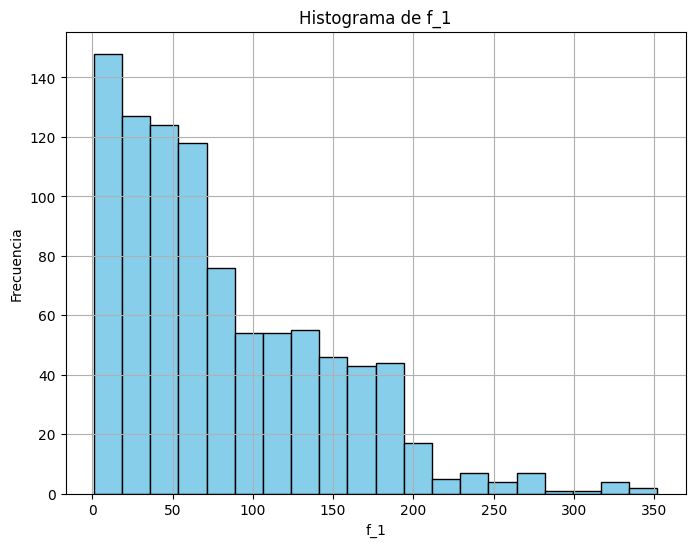

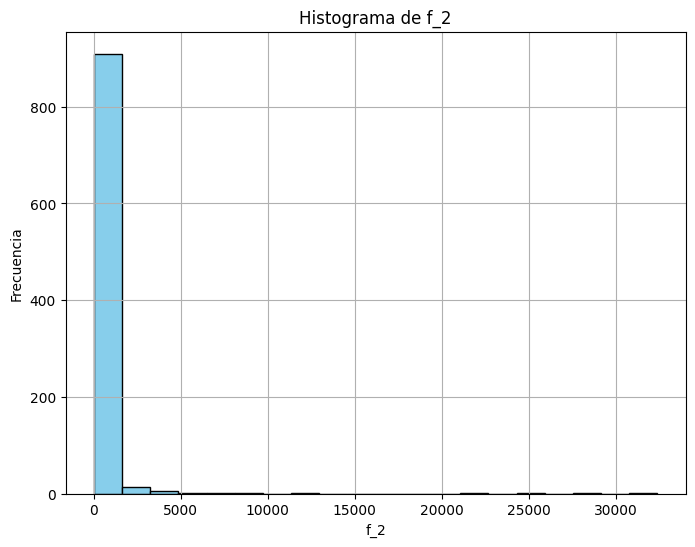

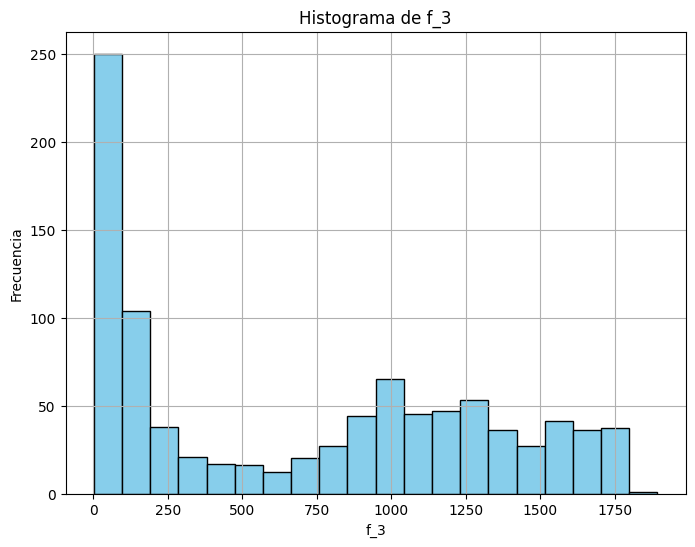

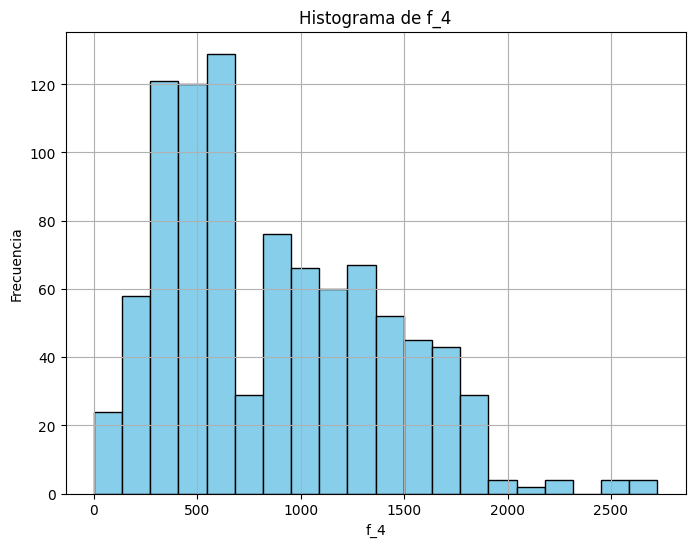

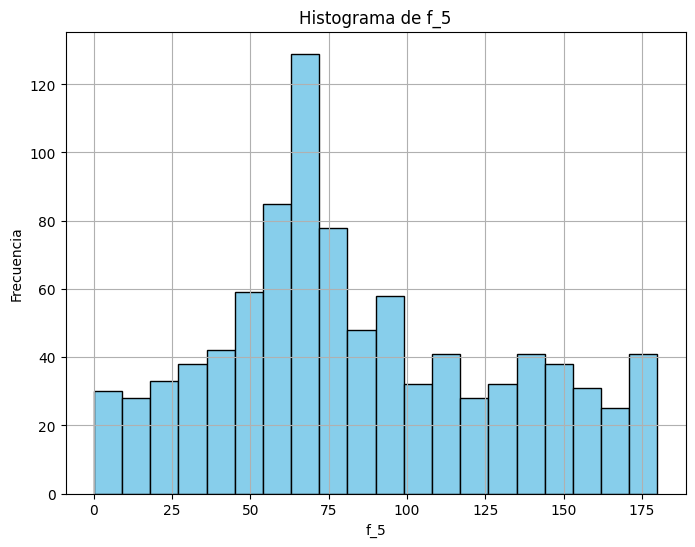

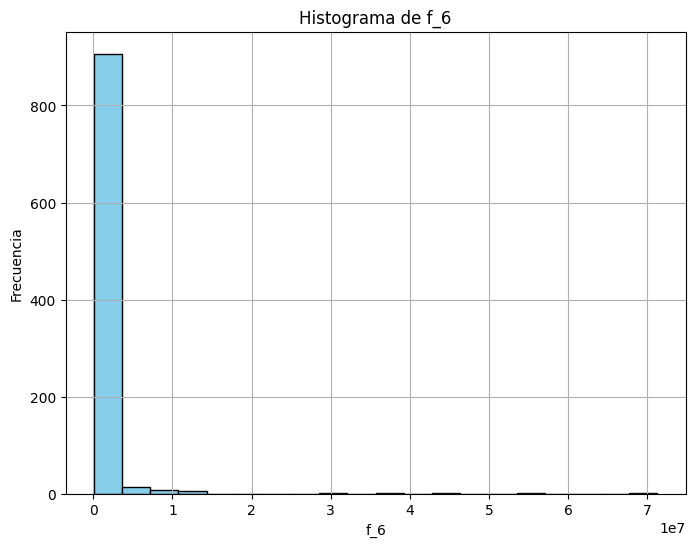

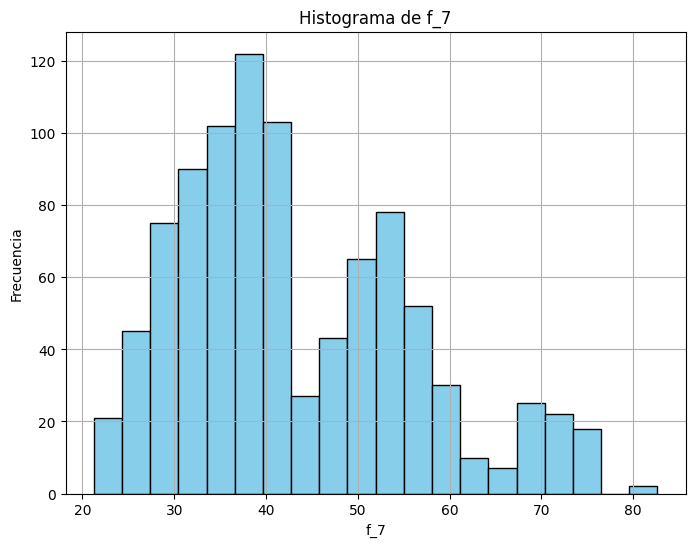

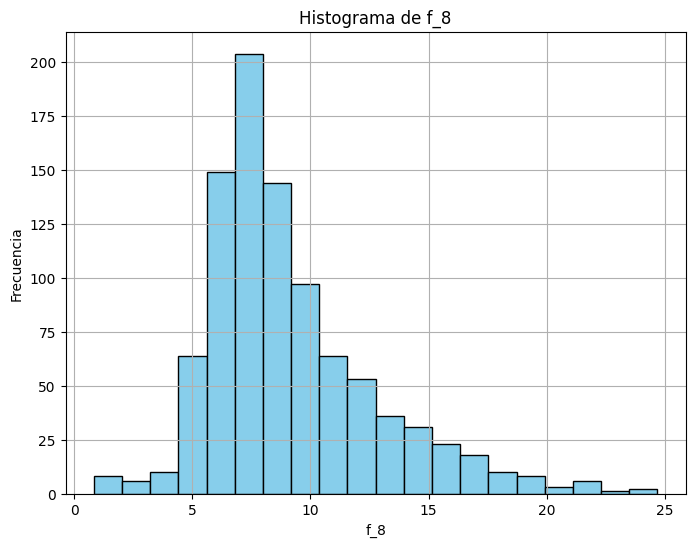

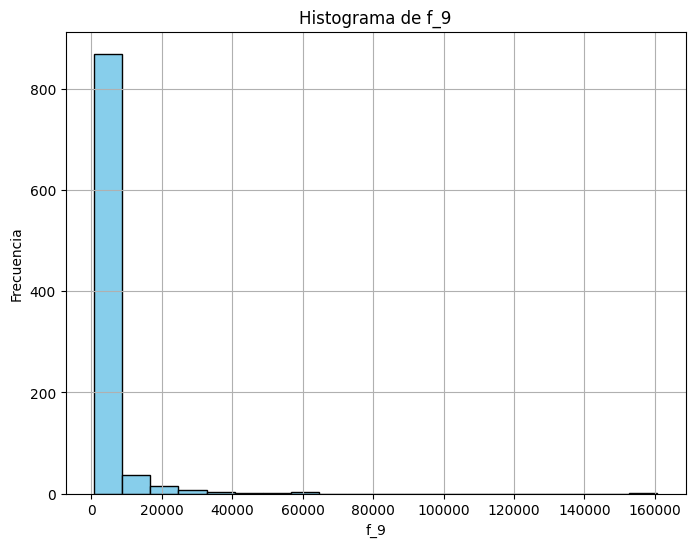

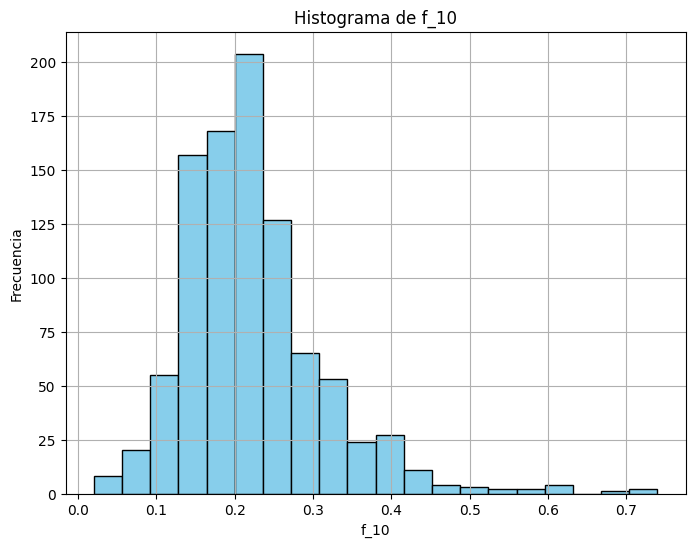

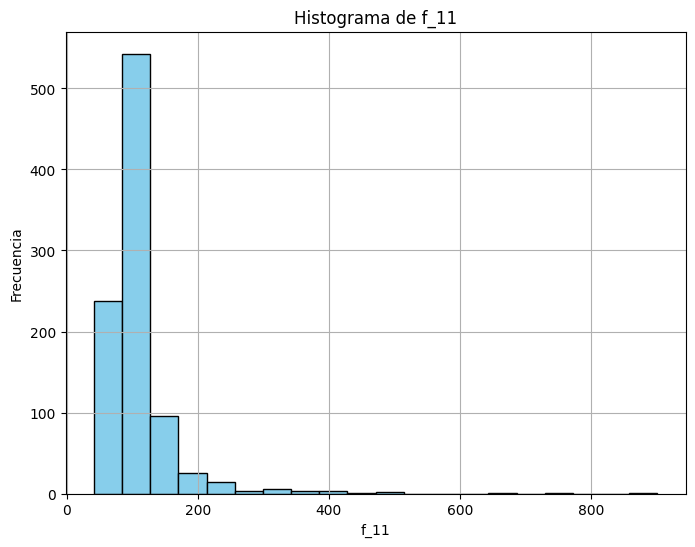

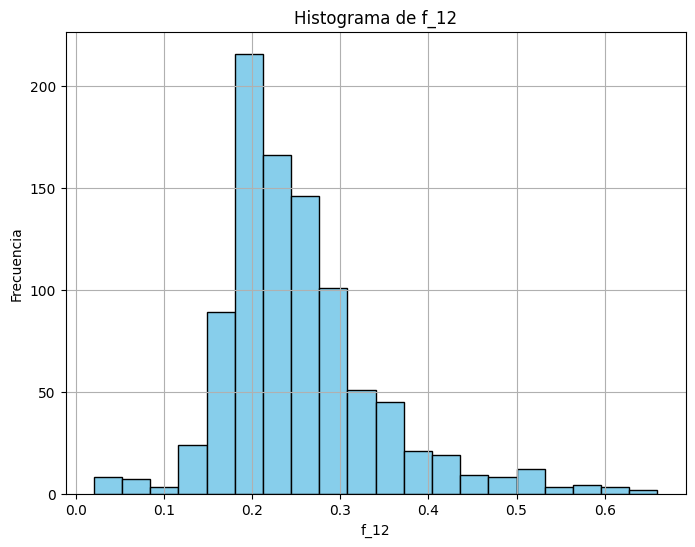

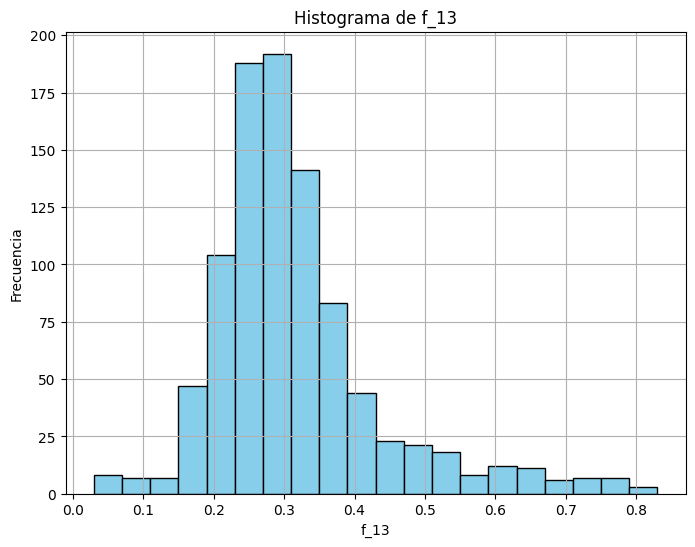

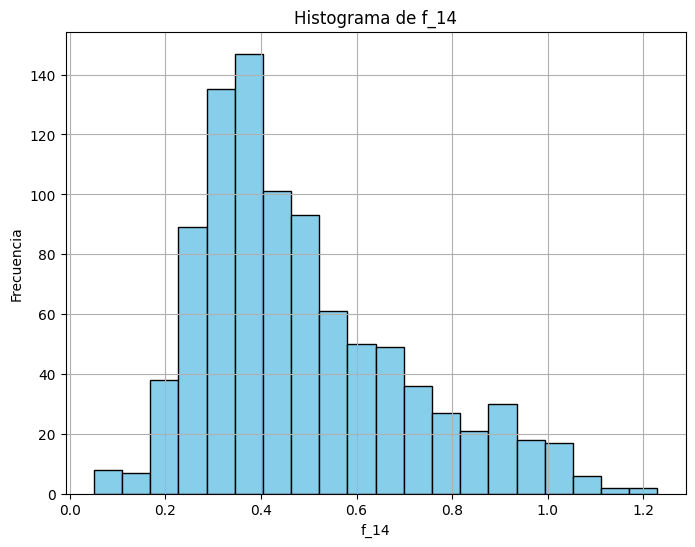

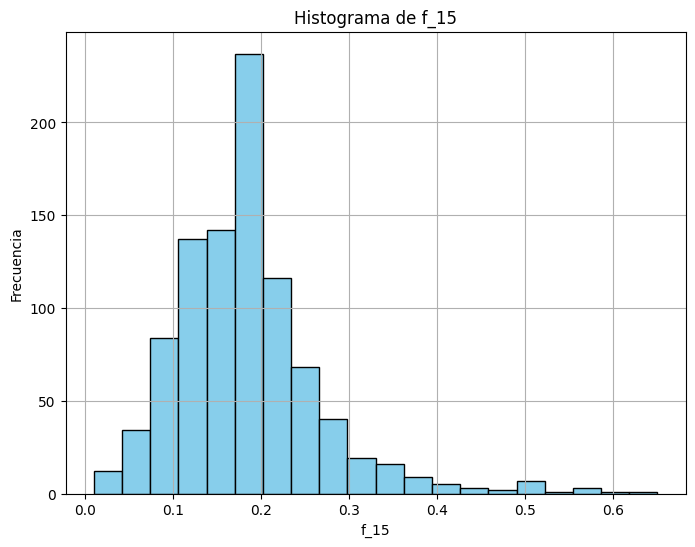

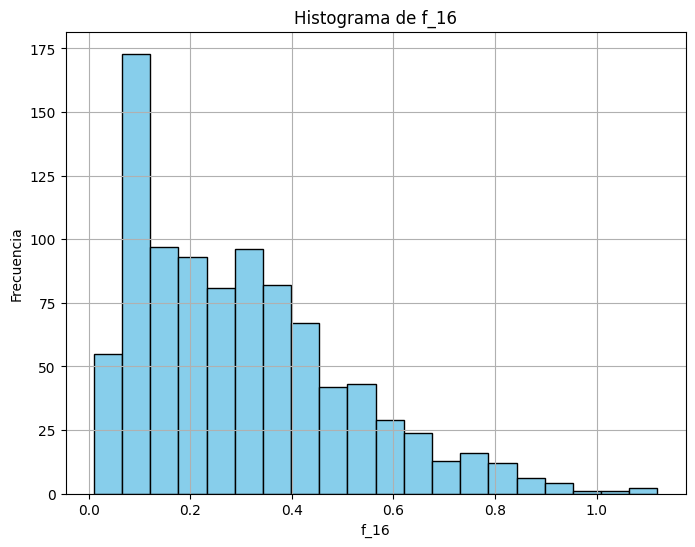

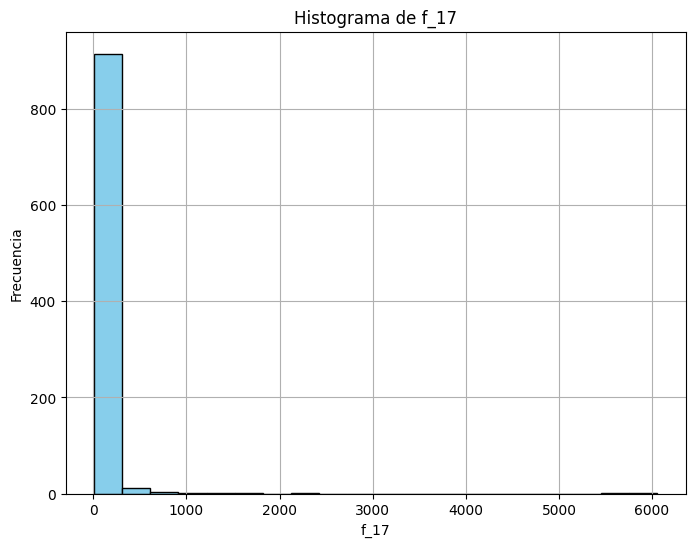

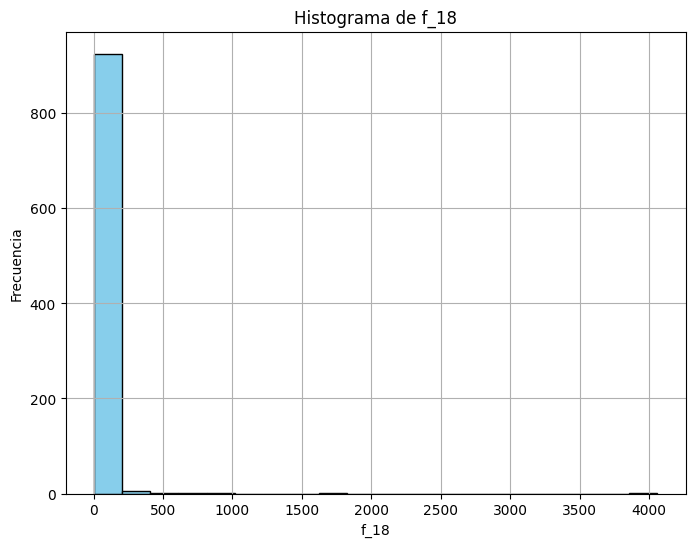

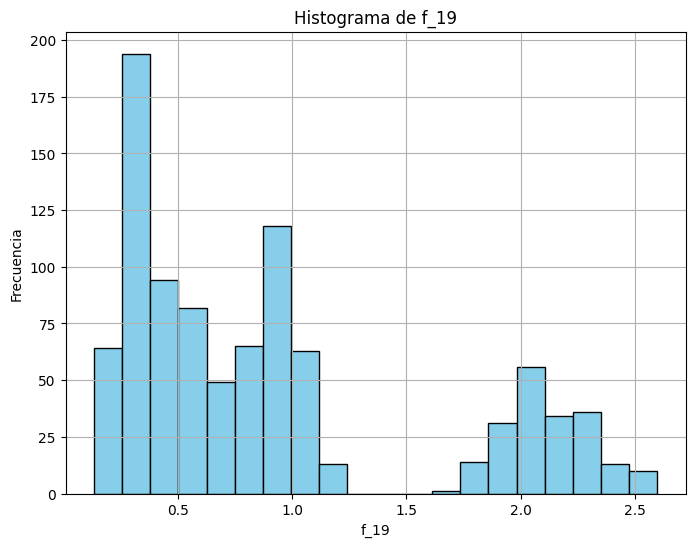

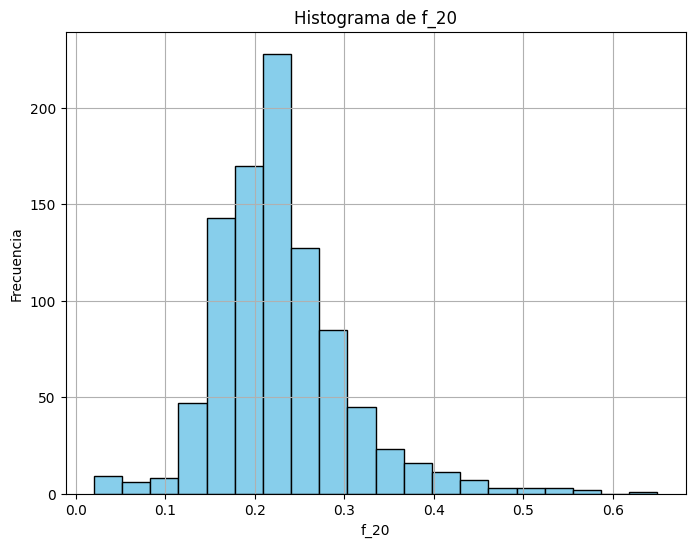

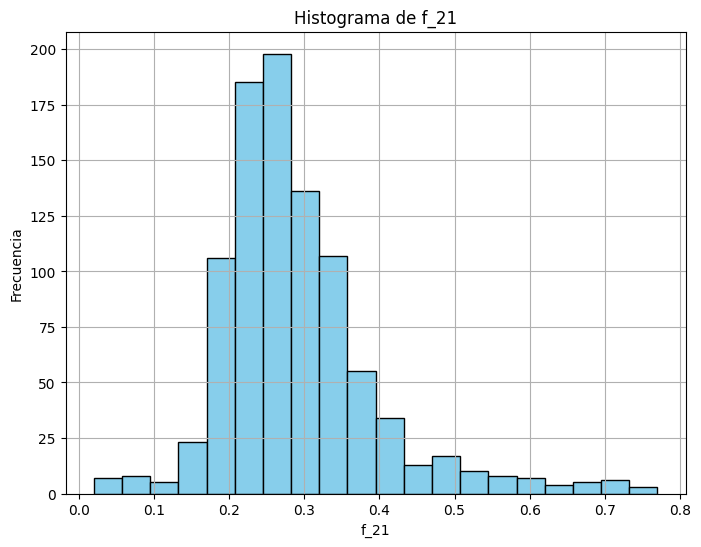

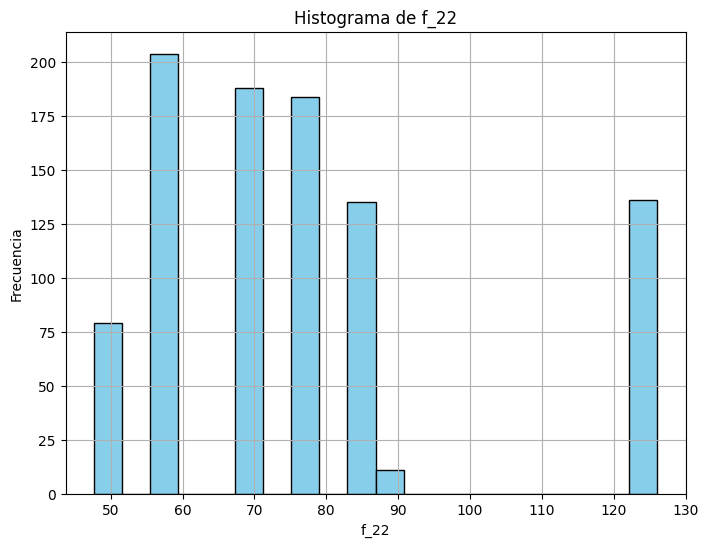

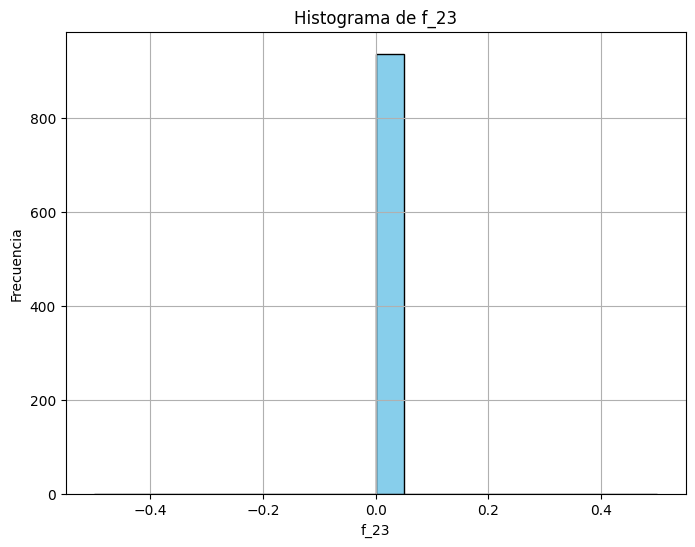

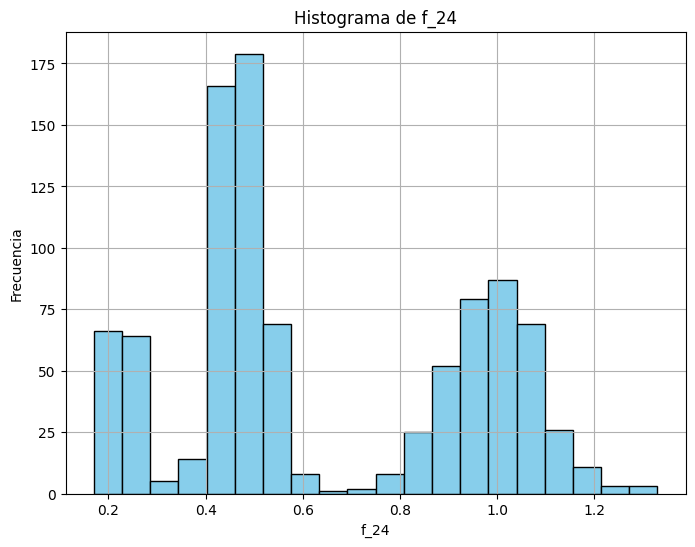

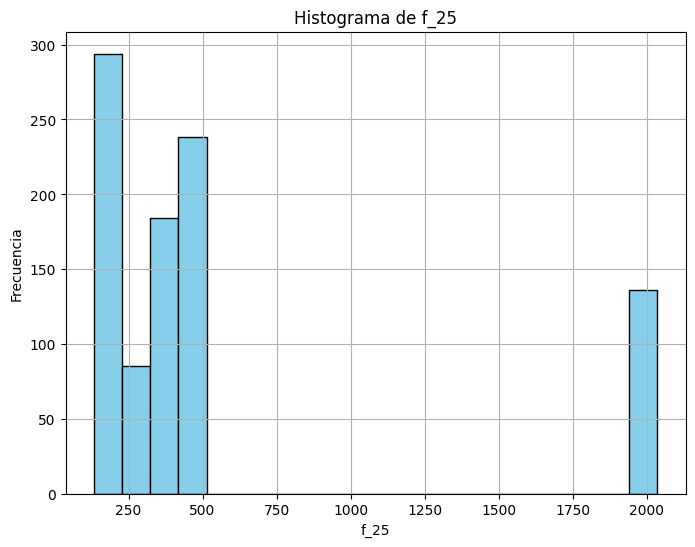

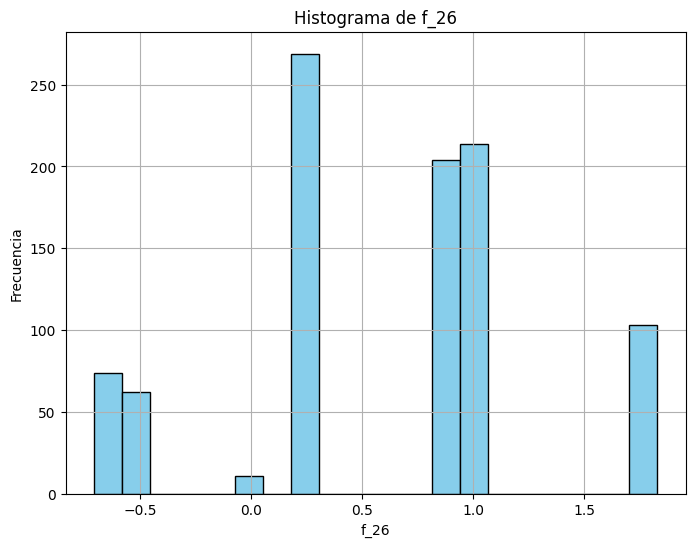

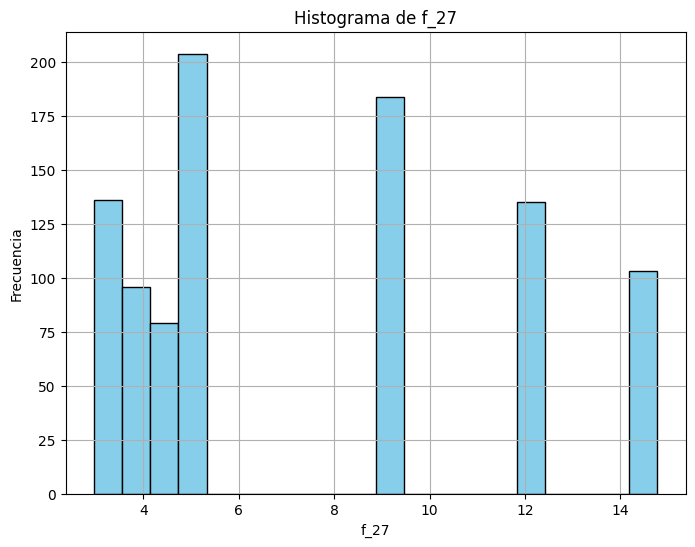

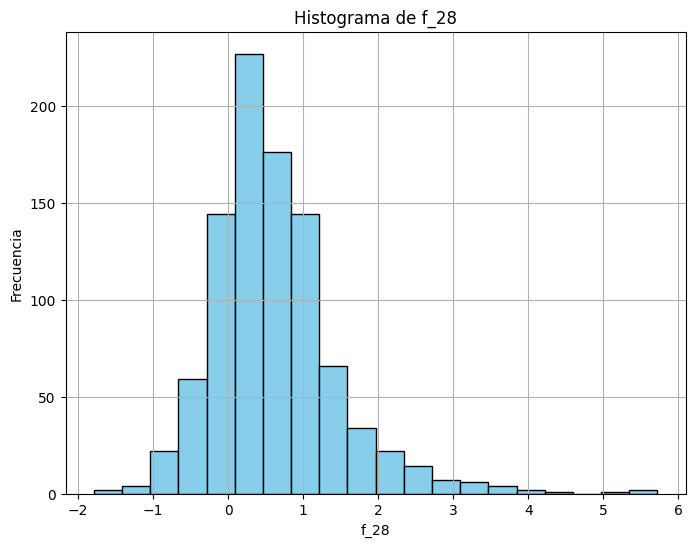

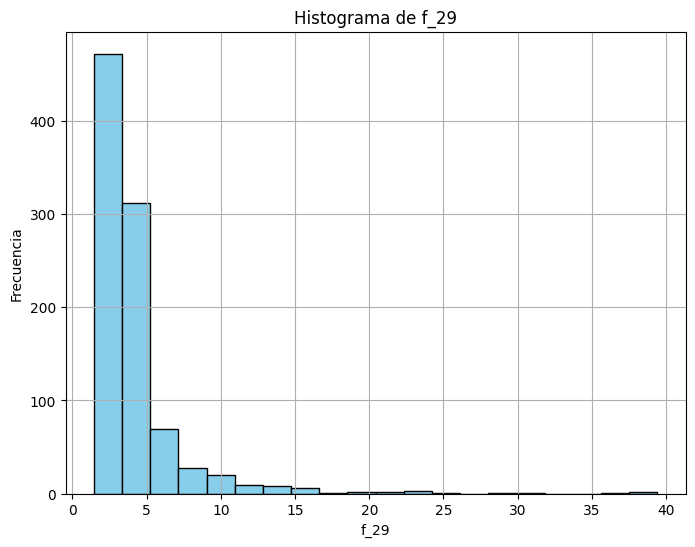

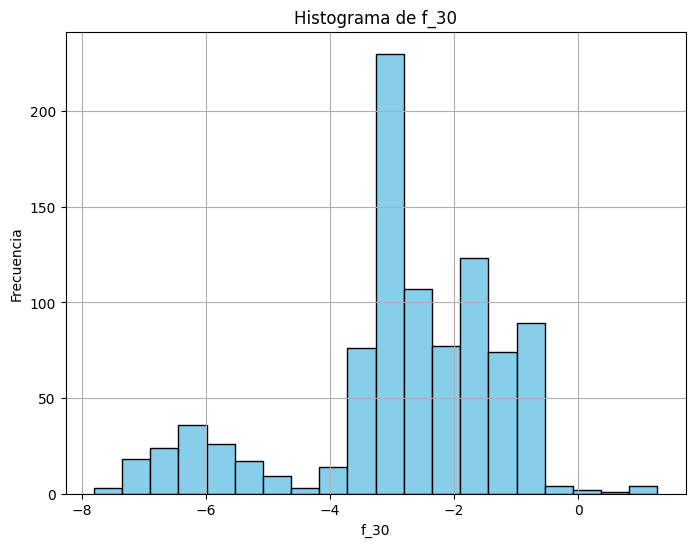

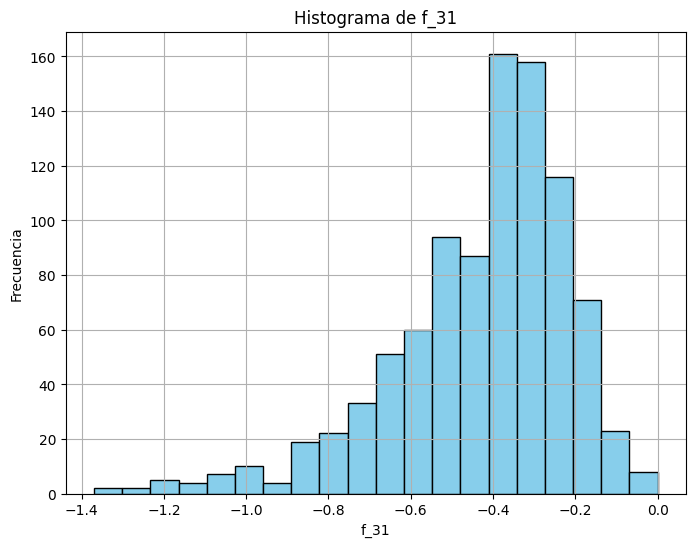

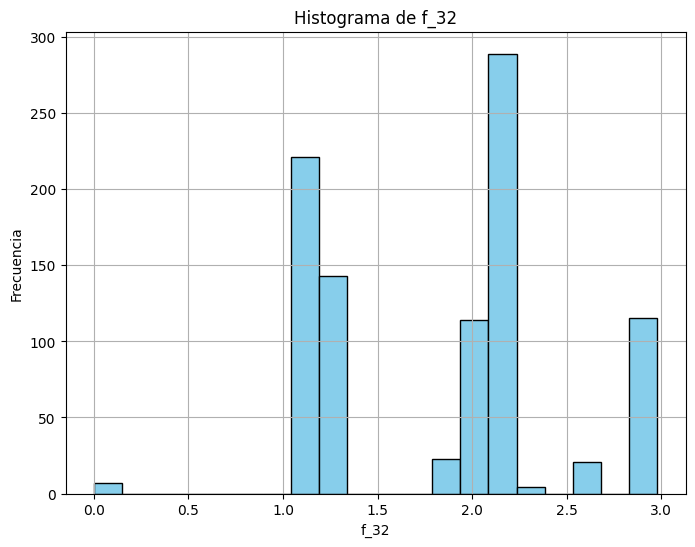

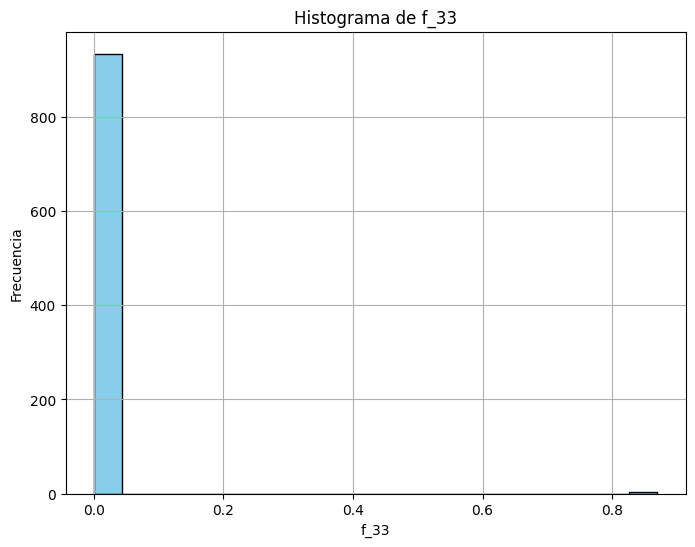

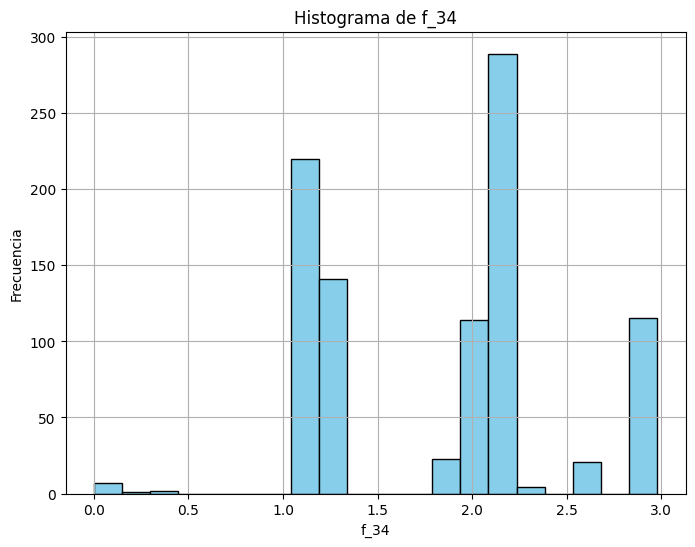

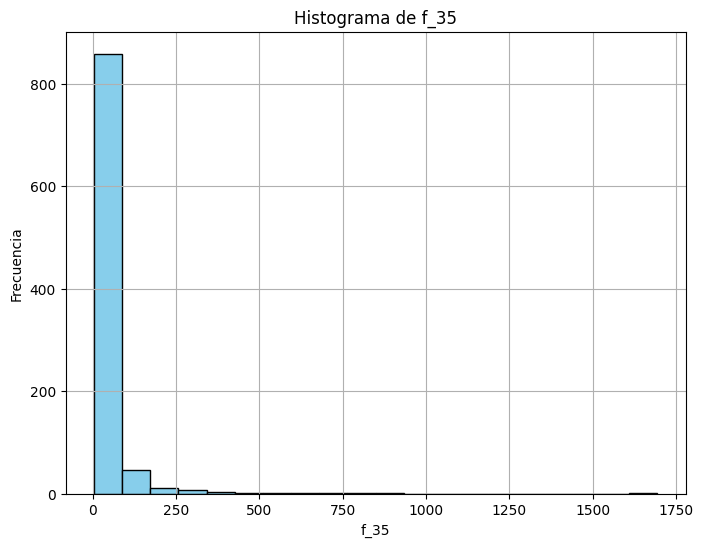

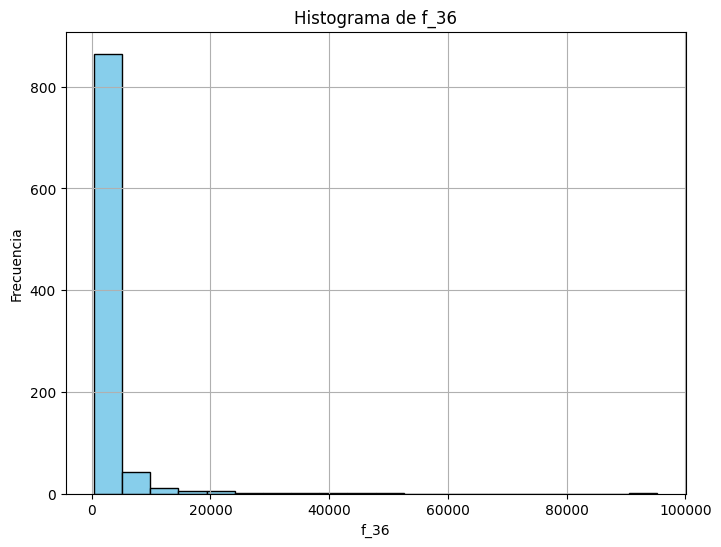

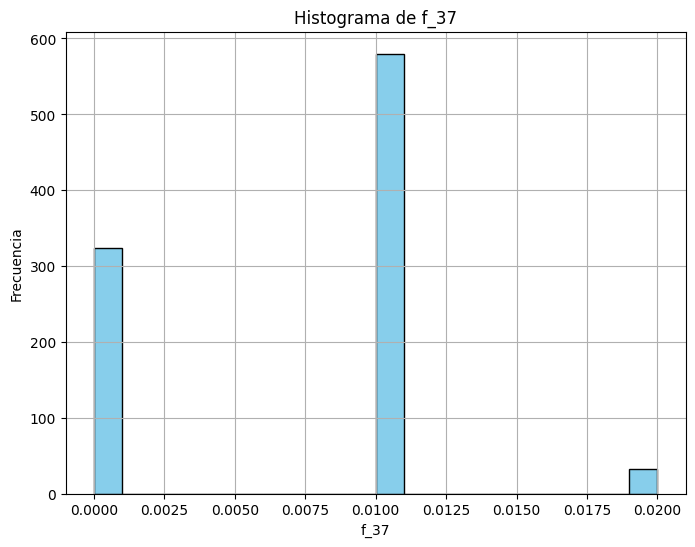

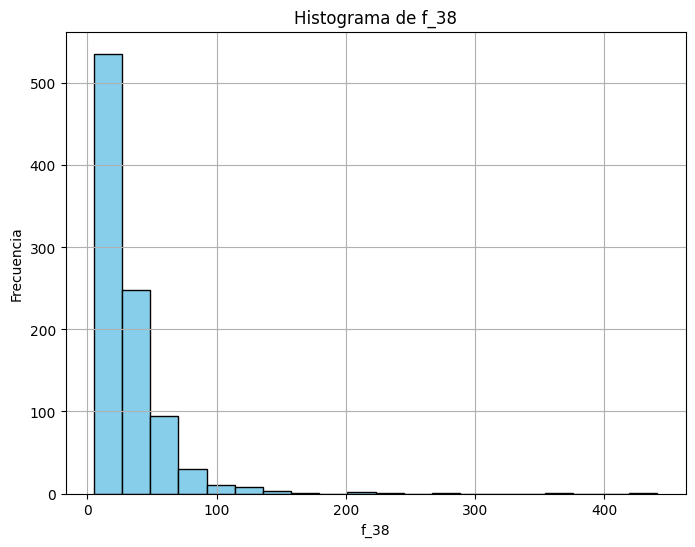

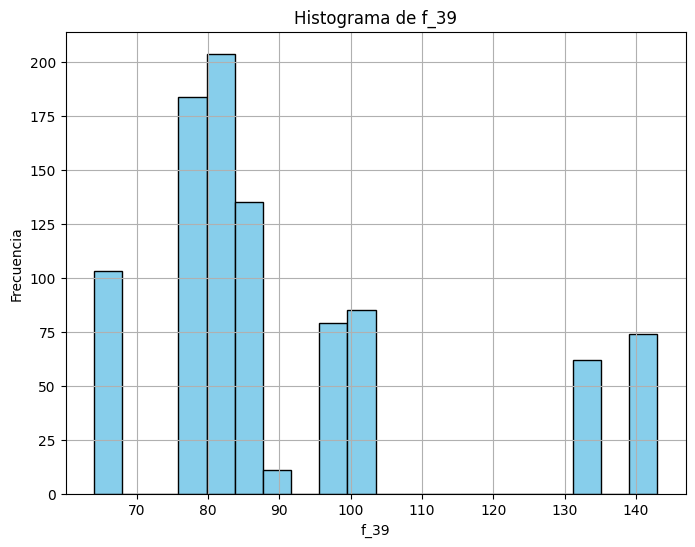

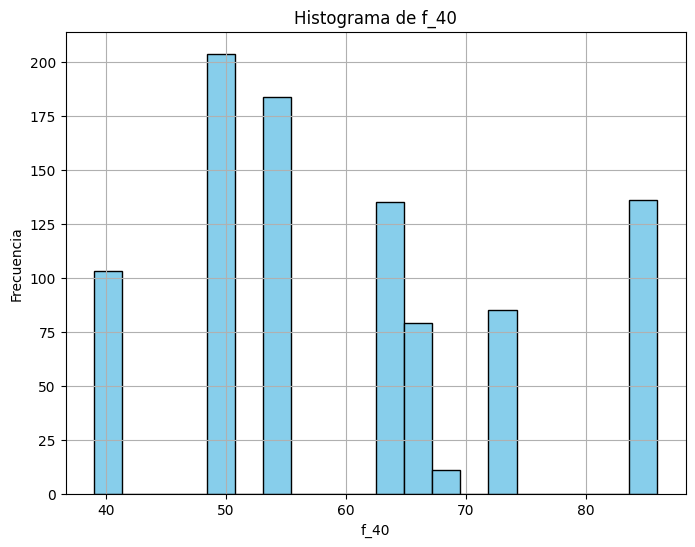

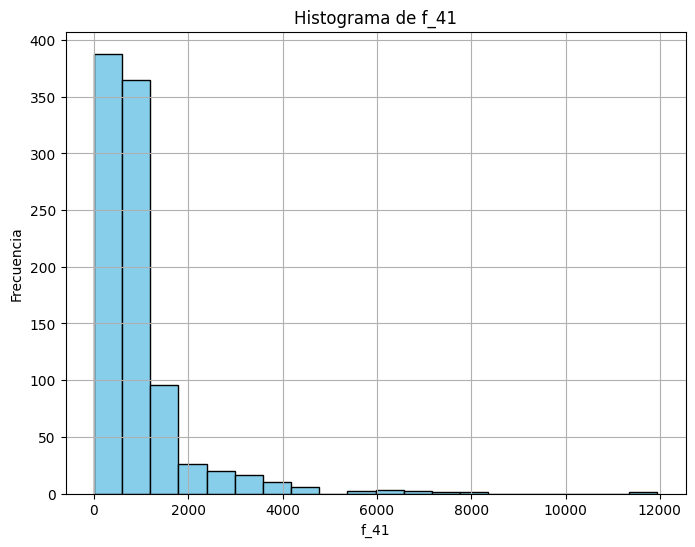

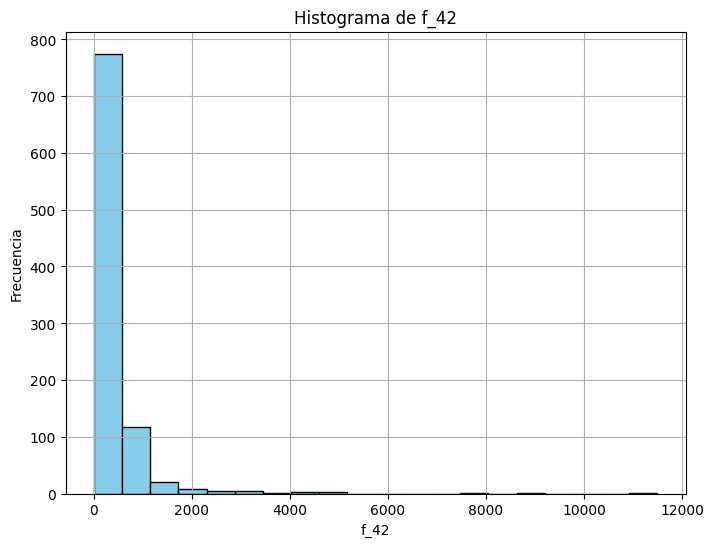

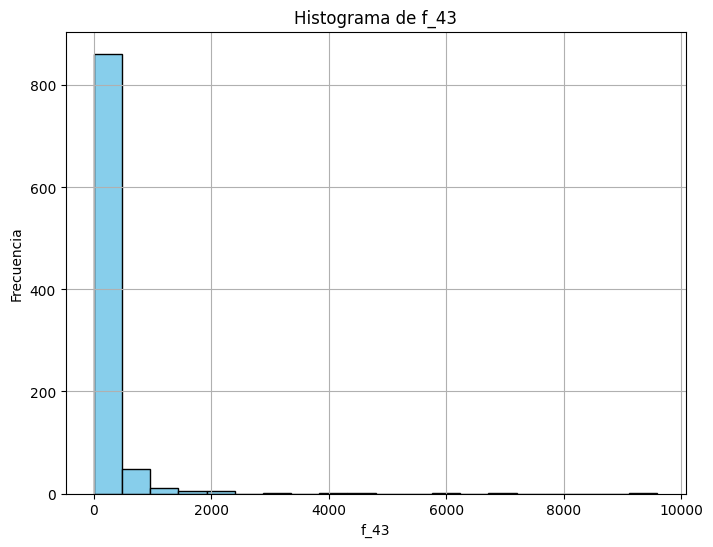

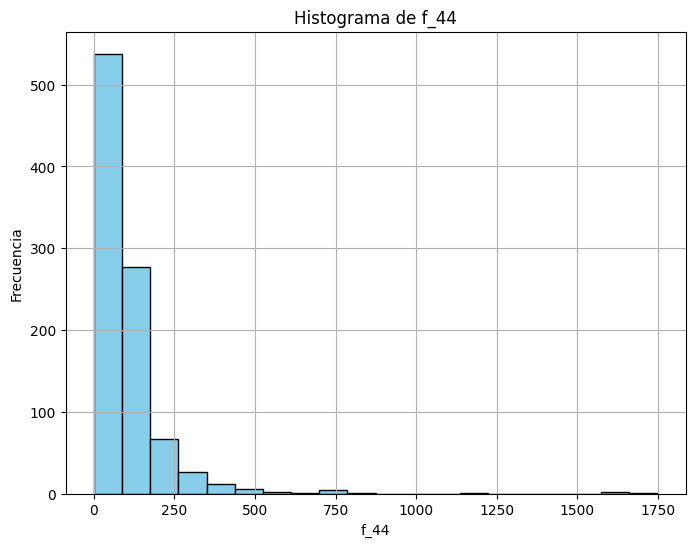

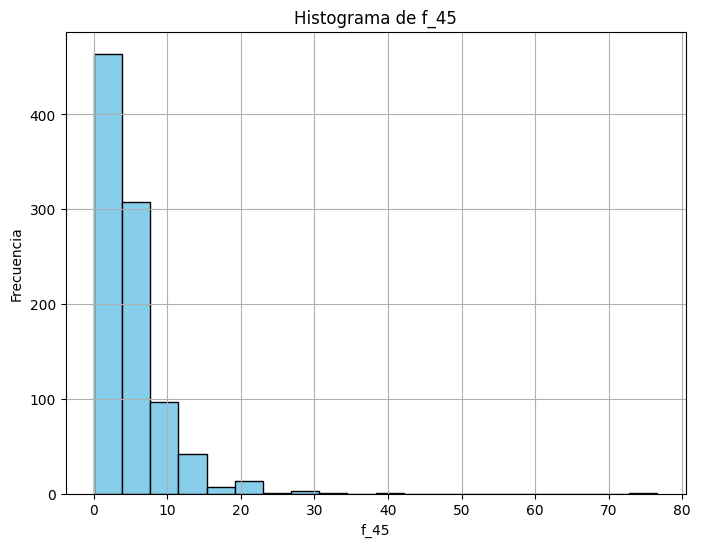

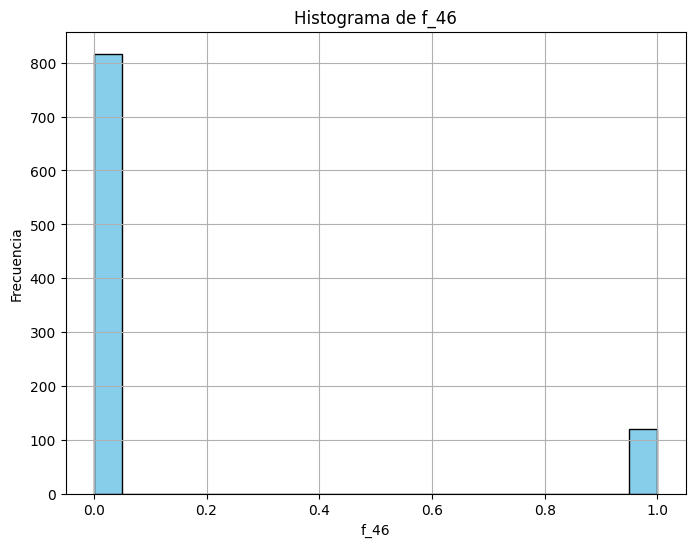

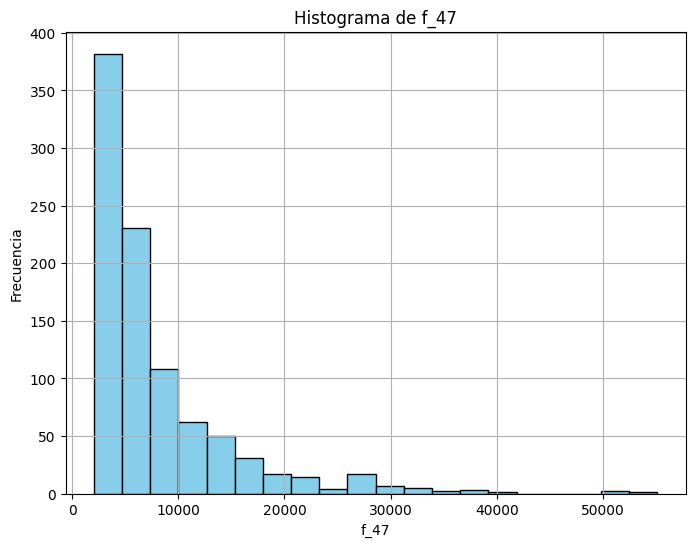

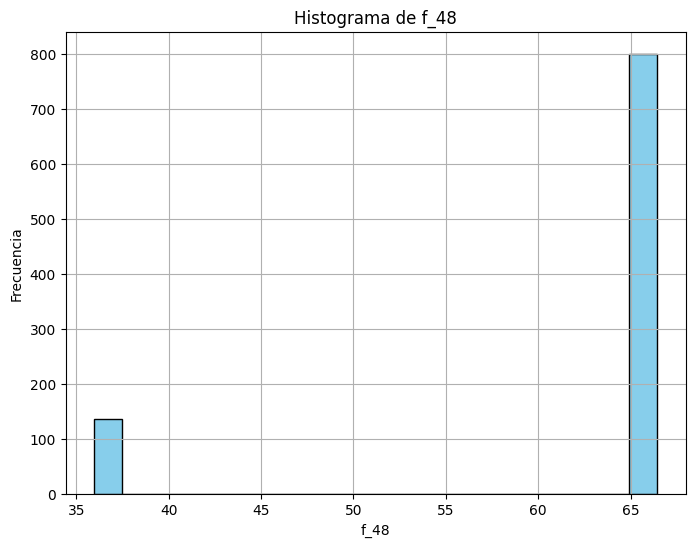

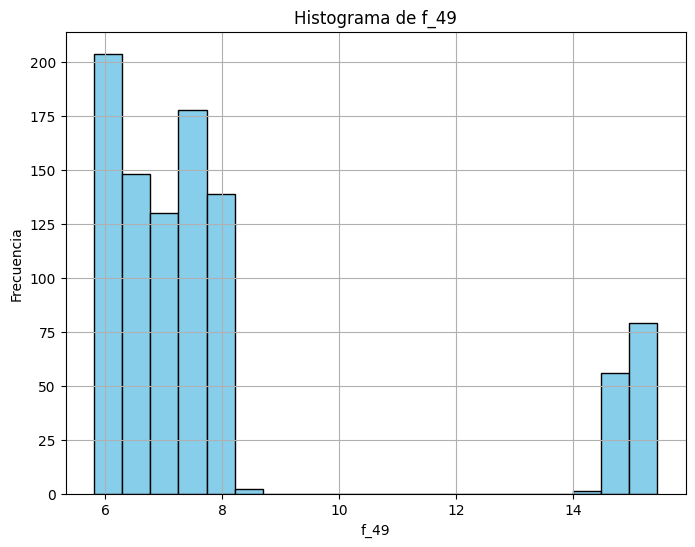

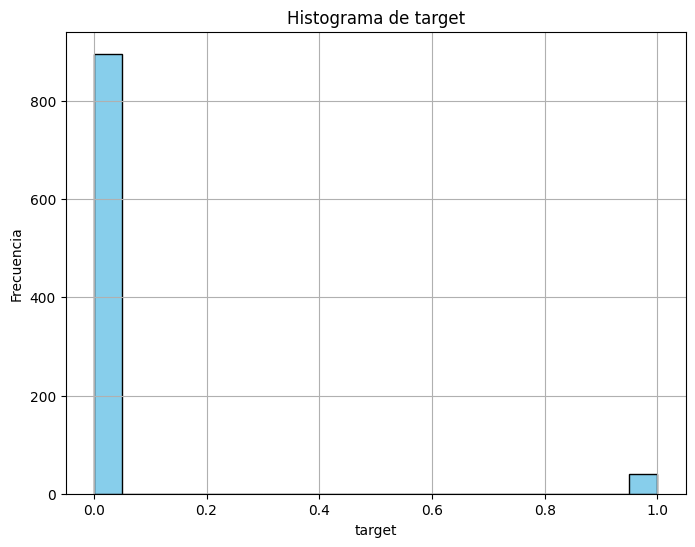

In [21]:
# Graficar histogramas para las variables numéricas
numeric_columns = oil_data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    oil_data[column].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

# Graficar gráficos de barras para las variables categóricas
categorical_columns = oil_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    oil_data[column].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title(f'Gráfico de barras de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

4. Identificacion de valores únicos por columna

  Conteo de valores unicos por columna

  1.   ¿Qué representan estos valores únicos?

      Estos valores representan el # de valores unicos que tiene o presenta cada columna

  2.   ¿Qué tratamiento se puede dar a columnas que tengan
  solamente 1 valor único en todo el dataset?

      Estas columnas dependiendo del valor que nos presente puede mantenerse si corresponde a una propiedad necesaria o puede eliminarse ya que al no reflejar un valor que se pieda evaluar o conparar, no proporciona valor.

  3.   ¿Qué tratamiento se puede dar a columnas que tengan 2, 3, 4 valores únicos en todo el dataset?

      Con las columnas que nos proporciones de 1 hasta 10 valores unicos se puede categorizar el data set dependiendo de las necesidades.
      Estas columnas pueden porporcionar informacion acerca de las caracteristicas que se encuentran con respecto a la clasificacion

In [22]:
# Calcular la cantidad de valores únicos por columna
unique_values_per_column = oil_data.nunique()

# Mostrar la cantidad de valores únicos por columna
print("Cantidad de valores únicos por columna:")
print(unique_values_per_column)
print()

# Identificar columnas con solo 1 valor único
columns_with_one_unique_value = unique_values_per_column[unique_values_per_column == 1]
print("Columnas con solo 1 valor:")
print(columns_with_one_unique_value)
print()

# Identificar columnas con 2, 3 o 4 valores únicos
columns_with_few_unique_values = unique_values_per_column[(unique_values_per_column >= 2) & (unique_values_per_column <= 4)]
print("Columnas con 2, 3 o 4 :")
print(columns_with_few_unique_values)

Cantidad de valores únicos por columna:
f_1       238
f_2       297
f_3       927
f_4       933
f_5       179
f_6       375
f_7       820
f_8       618
f_9       561
f_10       57
f_11      577
f_12       59
f_13       73
f_14      107
f_15       53
f_16       91
f_17      893
f_18      810
f_19      170
f_20       53
f_21       68
f_22        9
f_23        1
f_24       92
f_25        9
f_26        8
f_27        9
f_28      308
f_29      447
f_30      392
f_31      107
f_32       42
f_33        4
f_34       45
f_35      141
f_36      110
f_37        3
f_38      758
f_39        9
f_40        9
f_41      388
f_42      220
f_43      644
f_44      649
f_45      499
f_46        2
f_47      937
f_48      169
f_49      286
target      2
dtype: int64

Columnas con solo 1 valor:
f_23    1
dtype: int64

Columnas con 2, 3 o 4 :
f_33      4
f_37      3
f_46      2
target    2
dtype: int64


 5. Si el dataset tiene m muestras, ¿qué análisis o explicación se puede obtener de una columna que tenga un valor cercano a m valores únicos, o incluso m valores únicos?

  La explicacion seria que esa propiedad o caracteristica es de un valor unico o general para lo que se esta analizando, por ejemplo, se podria deducir que ese valor es constante en el oceano y no se ve afectado por el derrame de petroleo, por lo cual no caambia y no aportaria en el etiquetado para conocer si existe o no derrame de petroleo.


6. Una vez identificada(s) la(s) columna(s) con 1 solo valor único, remuévela(s) del dataset. ¿Con qué dimensiones queda el dataset?

In [23]:
# Identificar columnas con solo 1 valor único en todo el conjunto de datos
columns_with_one_unique_value = unique_values_per_column[unique_values_per_column == 1].index

# Remover las columnas con un solo valor único
oil_data_cleaned = oil_data.drop(columns_with_one_unique_value, axis=1)

# Verificar las nuevas dimensiones del conjunto de datos
print("Dimensiones del dataset después de remover columnas con 1 valor único:")
print(oil_data_cleaned.shape)

Dimensiones del dataset después de remover columnas con 1 valor único:
(937, 49)


7. Con el dataset original realiza un análisis sobre porcentajes de
importancia/incidencia de cada columna. El porcentaje se obtiene dividiendo la
cantidad de valores únicos para la cantidad de muestras, por 100. Selecciona un
criterio, por ejemplo 3% y determina cuántas y cuáles columnas se eliminan.
¿Cuál es la dimensión del dataset?


In [8]:
# Calcular el porcentaje de importancia de cada columna
importance_percentage = unique_values_per_column / oil_data.shape[0] * 100

# Establecer el criterio mínimo de importancia (por ejemplo, 3%)
cutoff_percentage = 3

# Identificar columnas que no cumplen con el criterio de importancia
columns_to_drop = importance_percentage[importance_percentage < cutoff_percentage].index

# Eliminar las columnas que no cumplen con el criterio de importancia
data_filtered = oil_data.drop(columns_to_drop, axis=1)

# Mostrar las columnas eliminadas
print("Columnas eliminadas:")
print(columns_to_drop)
print()

# Mostrar las nuevas dimensiones del dataset
print("Dimensiones del dataset después de aplicar el criterio de importancia:")
print(data_filtered.shape)

Columnas eliminadas:
Index(['f_22', 'f_23', 'f_25', 'f_26', 'f_27', 'f_33', 'f_37', 'f_39', 'f_40',
       'f_46', 'target'],
      dtype='object')

Dimensiones del dataset después de aplicar el criterio de importancia:
(937, 39)


8. Se puede realizar un análisis adicional en función de distintos rangos de
porcentajes y cuántas columnas se eliminarían para cada uno.


In [9]:
percentages_ranges = [1, 2, 3, 4, 5]

# Crear un diccionario para almacenar el número de columnas eliminadas para cada rango de porcentajes
columns_removed_per_range = {}

# Iterar sobre los rangos de porcentajes y contar cuántas columnas se eliminarían para cada uno
for percentage_range in percentages_ranges:
    # Calcular el porcentaje mínimo para este rango
    cutoff_percentage = percentage_range

    # Identificar columnas que no cumplen con el criterio de importancia
    columns_to_drop = importance_percentage[importance_percentage < cutoff_percentage].index

    # Guardar el número de columnas eliminadas para este rango de porcentajes
    columns_removed_per_range[percentage_range] = len(columns_to_drop)

# Mostrar el número de columnas eliminadas para cada rango de porcentajes
print("Número de columnas eliminadas para cada rango de porcentajes:")
for percentage_range, columns_removed in columns_removed_per_range.items():
    print(f"Porcentaje mínimo: {percentage_range}%, Columnas eliminadas: {columns_removed}")

Número de columnas eliminadas para cada rango de porcentajes:
Porcentaje mínimo: 1%, Columnas eliminadas: 11
Porcentaje mínimo: 2%, Columnas eliminadas: 11
Porcentaje mínimo: 3%, Columnas eliminadas: 11
Porcentaje mínimo: 4%, Columnas eliminadas: 11
Porcentaje mínimo: 5%, Columnas eliminadas: 13


9. Con el dataset original realiza un análisis sobre umbrales de varianza de cada columna. Puedes utilizar los valores por defecto de la función
VarianceThreshold para la limpieza y determinar cuántas y cuáles columnas se
eliminan. ¿Cuál es la dimensión del dataset?

In [10]:
from sklearn.feature_selection import VarianceThreshold

# Crear un objeto VarianceThreshold con los valores por defecto
selector = VarianceThreshold()

# Ajustar el selector a los datos
selector.fit(oil_data)

# Obtener las columnas que se mantienen después de aplicar el umbral de varianza
columns_to_keep = oil_data.columns[selector.get_support()]

# Obtener las columnas que se eliminan
columns_to_drop = oil_data.columns[~selector.get_support()]

# Eliminar las columnas que no cumplen con el umbral de varianza
data_filtered = oil_data[columns_to_keep]

# Mostrar las columnas eliminadas
print("Columnas eliminadas:")
print(columns_to_drop)
print()

# Mostrar las nuevas dimensiones del dataset
print("Dimensiones del dataset después de aplicar el umbral de varianza:")
print(data_filtered.shape)


Columnas eliminadas:
Index(['f_23'], dtype='object')

Dimensiones del dataset después de aplicar el umbral de varianza:
(937, 49)


10. Se puede realizar un análisis adicional explorando el(los) parámetro(s) de la función propuesta, y asignando distintos valores.


In [11]:
from sklearn.feature_selection import VarianceThreshold

# Definir una lista de valores de umbral para explorar
threshold_values = [0.0, 0.1, 0.5, 1.0]

# Crear un diccionario para almacenar las columnas eliminadas para cada valor de umbral
columns_removed_per_threshold = {}

# Iterar sobre los valores de umbral y observar cuántas columnas se eliminan para cada uno
for threshold in threshold_values:
    # Crear un objeto VarianceThreshold con el valor de umbral actual
    selector = VarianceThreshold(threshold=threshold)

    # Ajustar el selector a los datos
    selector.fit(oil_data)

    # Obtener las columnas que se mantienen después de aplicar el umbral de varianza
    columns_to_keep = oil_data.columns[selector.get_support()]

    # Obtener las columnas que se eliminan
    columns_to_drop = oil_data.columns[~selector.get_support()]

    # Guardar el número de columnas eliminadas para este valor de umbral
    columns_removed_per_threshold[threshold] = len(columns_to_drop)

# Mostrar el número de columnas eliminadas para cada valor de umbral
print("Número de columnas eliminadas para cada valor de umbral:")
for threshold, columns_removed in columns_removed_per_threshold.items():
    print(f"Umbral: {threshold}, Columnas eliminadas: {columns_removed}")


Número de columnas eliminadas para cada valor de umbral:
Umbral: 0.0, Columnas eliminadas: 1
Umbral: 0.1, Columnas eliminadas: 14
Umbral: 0.5, Columnas eliminadas: 19
Umbral: 1.0, Columnas eliminadas: 20


11. A pesar de que no se tienen nombres para las columnas, identifica qué columna puede servir como variable objetivo, e implementa una regresión (con todo el dataset, sin dividirlo en conjunto de entrenamiento y pruebas). Presenta los resultados y el análisis. Toma en cuenta si realizas o no limpieza de los datos y qué criterios utilizas. Explica el proceso y la(s) métrica(s) de desempeño.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Identificar la columna que podría servir como variable objetivo
# Supongamos que la última columna es la variable objetivo
target_column = oil_data.columns[-1]

# Extraer las características (todas las columnas excepto la variable objetivo)
features = oil_data.drop(target_column, axis=1)

# Extraer la variable objetivo
target = oil_data[target_column]

# Implementar una regresión lineal utilizando todas las características
regression_model = LinearRegression()
regression_model.fit(features, target)

# Predecir los valores de la variable objetivo utilizando el modelo entrenado
predictions = regression_model.predict(features)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(target, predictions)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.4257294122539804


 12. Pueden escoger otra(s) columnas para realizar otro tipo de regresión.


In [14]:
target_column = oil_data.columns[-2]  # Por ejemplo, seleccionamos la penúltima columna

# Extraer las características (todas las columnas excepto la variable objetivo)
features = oil_data.drop(target_column, axis=1)

# Extraer la variable objetivo
target = oil_data[target_column]

# Implementar una regresión lineal utilizando todas las características
regression_model = LinearRegression()
regression_model.fit(features, target)

# Predecir los valores de la variable objetivo utilizando el modelo entrenado
predictions = regression_model.predict(features)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(target, predictions)
print("Coeficiente de determinación (R^2):", r2)

Coeficiente de determinación (R^2): 0.9976506918991929


13. Se puede dividir el dataset en conjuntos de entrenamiento y pruebas, o realizar cross-validation, y analizar las diferencias.


In [15]:
from sklearn.model_selection import train_test_split
# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Implementar una regresión lineal utilizando los datos de entrenamiento
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predecir los valores de la variable objetivo utilizando el modelo entrenado en los datos de prueba
predictions = regression_model.predict(X_test)

# Calcular el coeficiente de determinación (R^2) en los datos de prueba
r2 = r2_score(y_test, predictions)
print("Coeficiente de determinación (R^2) con división en entrenamiento y prueba:", r2)

Coeficiente de determinación (R^2) con división en entrenamiento y prueba: 0.9970519484733268


In [16]:
from sklearn.model_selection import cross_val_score

# Implementar una regresión lineal utilizando validación cruzada con 5 folds
regression_model_cv = LinearRegression()
cv_scores = cross_val_score(regression_model_cv, features, target, cv=5, scoring='r2')

# Calcular el promedio de los coeficientes de determinación (R^2) obtenidos en cada fold
cv_r2_mean = cv_scores.mean()
print("Coeficiente de determinación (R^2) con validación cruzada (5 folds):", cv_r2_mean)

Coeficiente de determinación (R^2) con validación cruzada (5 folds): 0.5026221738977835


14. ¿Es necesario realizar algún otro proceso de limpieza o de tratamiento de datos?

    Si es necesario realizar una limpieza o tratamiento de datos a la base para eliminar los datos que no proporcionan información relevante, pero para ello es necesario tener un contexto de lo que implica cada una de las propiedades.

    Se podria realizar:

  *   Manejo de valores faltantes
  *   Escalado de características
  *   Reesmplazo de datos erroneos con la media de las columnas
  *   Tratamiento de datos desbalanceados




# Fase 2